# Relax Take Home Challenge

Data includs a user table ( "takehome_users" ) with data on 12,000 users who signed up for the
product in the last two years. Another file includs a usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.

Purpose of analysis is to define an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period. Identify which factors predict future user adoption.

### Data Import and Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
from datetime import timedelta

In [2]:
#Import Data:
User_Engagement = pd.read_csv('/Users/carolinerosefrensko/Downloads/relax_challenge/takehome_user_engagement.csv')

In [3]:
Users = pd.read_csv('/Users/carolinerosefrensko/Downloads/relax_challenge/takehome_users.csv', encoding='latin1')

In [4]:
#Overview of Data:
User_Engagement.info()
User_Engagement.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [5]:
# Convert dates to datetime objs
User_Engagement['time_stamp'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), User_Engagement['time_stamp']))

In [6]:
User_Engagement.head()

,time_stamp,user_id,visited
0,2014-04-22,1,1
1,2013-11-15,2,1
2,2013-11-29,2,1
3,2013-12-09,2,1
4,2013-12-25,2,1


In [7]:
#Discover time frame of user engagement
print("First Time Stamp:",User_Engagement['time_stamp'].min())
print("Last Time Stamp:",User_Engagement['time_stamp'].max())

First Time Stamp: 2012-05-31 00:00:00
Last Time Stamp: 2014-06-06 00:00:00


In [8]:
#Count unique user visits
User_Engagement_Separated=pd.DataFrame(User_Engagement['user_id'].value_counts())
User_Engagement_Separated.reset_index(inplace=True)
User_Engagement_Separated.columns=['User_ID','Number of Visits']
User_Engagement_Separated.head()

,User_ID,Number of Visits
0,3623,606
1,906,600
2,1811,593
3,7590,590
4,8068,585


In [9]:
Users.info()
Users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [10]:
Users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [11]:
# Convert dates to datetime objs
Users['creation_time'] = list(map(lambda x: datetime.strptime(x.split()[0],'%Y-%m-%d'), Users['creation_time']))

In [12]:
#Discover time frame users created their account
print("First Time Stamp:",Users['creation_time'].min())
print("Last Time Stamp:",Users['creation_time'].max())

First Time Stamp: 2012-05-31 00:00:00
Last Time Stamp: 2014-05-30 00:00:00


In [13]:
#Count unique values in user data set
print("Unique user id's: ", len(Users['object_id'].unique()))
print("Unique user names: ", len(Users['name'].unique()))
print("Unique emails: ", len(Users['email'].unique()))

Unique user id's:  12000
Unique user names:  11355
Unique emails:  11980


Text(0,0.5,'Number of Unique Users')

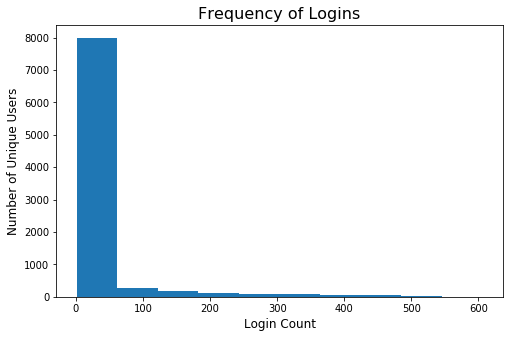

In [14]:
plt.figure(figsize=(8,5))
plt.hist(User_Engagement.groupby('user_id').size())
plt.title('Frequency of Logins', fontsize = 16)
plt.xlabel('Login Count', fontsize = 12)
plt.ylabel('Number of Unique Users', fontsize = 12)

Initial Observations:

* The data collected spans from the first account creaed on 2012-05-31 at 00:43:27 till the last login on 2014-06-06 at 14:58:50.

* There are 12,000 unique user id logins, with 11355 unique user names and 11980 unique email addresses. This shows there are only 20 email addresses with multiple accounts. This shows there must be many individuals with duplicate names. With only 20 duplicates user id can reliably be used to identify unique logins.

* The chart above shows that a majority of the users have logged in less than 50 times with good number of users actively logging on up to a hundred times. The maximum number of logins was 606 times.

### Determine Number of Logins & Adopted Users (Logged in more than 3 days in a week)

In [15]:
#Define count of engagements
count_of_engagements = {}

#Loop over each row to get number of logins
for index,row in User_Engagement.iterrows():
    if row['user_id'] in count_of_engagements:
        count_of_engagements[row['user_id']] += 1
    else:
        count_of_engagements[row['user_id']] = 1

#Convert to dataframe
counts = pd.DataFrame.from_dict(count_of_engagements, orient='index')
counts.columns= ['visit_count']
counts = counts.reset_index(drop=False)
counts.columns=['user_id', 'visit_count']

In [16]:
#Create time difference column for Users dataframe

Users['last_session_creation_time'] = pd.to_datetime(Users['last_session_creation_time'], unit='s')
Users['creation_time'] = pd.to_datetime(Users['creation_time'])

Users['creation_time_difference'] = Users['last_session_creation_time'].sub(Users['creation_time'], axis=0)
Users.rename(columns={'object_id': 'user_id'}, inplace=True)
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
creation_time_difference      8823 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), int64(4), object(3), timedelta64[ns](1)
memory usage: 1.0+ MB


In [17]:
#Merge dataframes
final_df = Users.merge(counts, how='left', on='user_id')
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days 03:53:30,1.0
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days 03:45:04,14.0
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days 23:14:52,1.0
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days 08:09:28,1.0
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days 10:14:20,1.0


In [18]:
#Adopted users
final_df['adopted_user'] = ((final_df['visit_count'] > 3) & (final_df['creation_time_difference'] > np.timedelta64(7,'D')))
final_df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_difference,visit_count,adopted_user
0,1,2014-04-22,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0 days 03:53:30,1.0,False
1,2,2013-11-15,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136 days 03:45:04,14.0,True
2,3,2013-03-19,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0 days 23:14:52,1.0,False
3,4,2013-05-21,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1 days 08:09:28,1.0,False
4,5,2013-01-17,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5 days 10:14:20,1.0,False


In [19]:
adopt_perc = len(final_df[final_df['adopted_user'] == True]) / len(final_df)
print(adopt_perc)

0.16725


### Exploratory Data Analysis

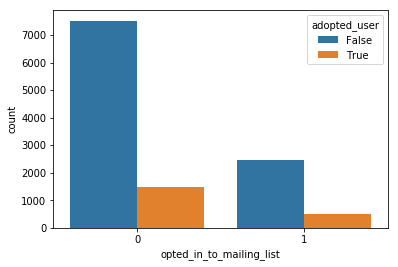

In [20]:
#Analysis of adopted user and whether they opted into marketing emails
sns.countplot(x='opted_in_to_mailing_list', hue='adopted_user', data=final_df)

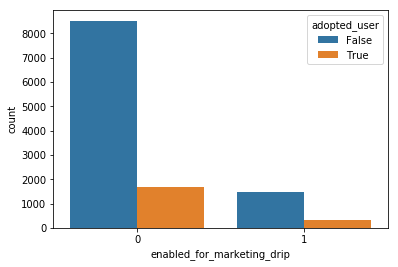

In [21]:
#Analysis of adopted users with regular promotional marketing email
sns.countplot(x='enabled_for_marketing_drip', hue='adopted_user', data=final_df)

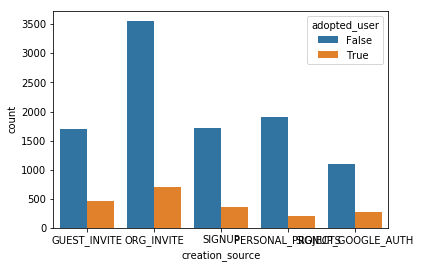

In [22]:
#Analysis of adopted users and how their account was created:
#PERSONAL_PROJECTS: invited to join another user's personal workspace
#○ GUEST_INVITE: invited to an organization as a guest
#(limited permissions)
#○ ORG_INVITE: invited to an organization (as a full member)
#○ SIGNUP: signed up via the website
#○ SIGNUP_GOOGLE_AUTH: signed up using Google
#Authentication (using a Google email account for their login id)
sns.countplot(x='creation_source', hue='adopted_user', data=final_df)

* A total of 16.7% of users were adopted users. They logged in more than 3 times in a week.
* It appears that an invite to the organization as a guest is the most successful way to become an adopted user.
* Marketing emails did not seem to make a difference in usage.